<a href="https://colab.research.google.com/github/prabhakarkhandavalli/MS56AIMLLinearRegression/blob/master/prabhakar_khandavalli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bike Sharing System
#### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

Essentially the company wants to know:
*   The factors affecting the demand for these shared bikes in the American market
*   Which variables are significant in predicting the demand for shared bikes.
*   How well those variables describe the bike demands




## Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the bike dataset

In [250]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Inspect the various aspects of the day dataframe

In [252]:
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [253]:
day.shape

(730, 16)

In [254]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [255]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Variables 'instant', 'dteday', 'atemp', 'casual' and 'registered' seems to be insignificant so lets drop those variables

In [256]:
day.drop(['instant','dteday', 'atemp', 'casual','registered'], axis= 1, inplace=True)
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

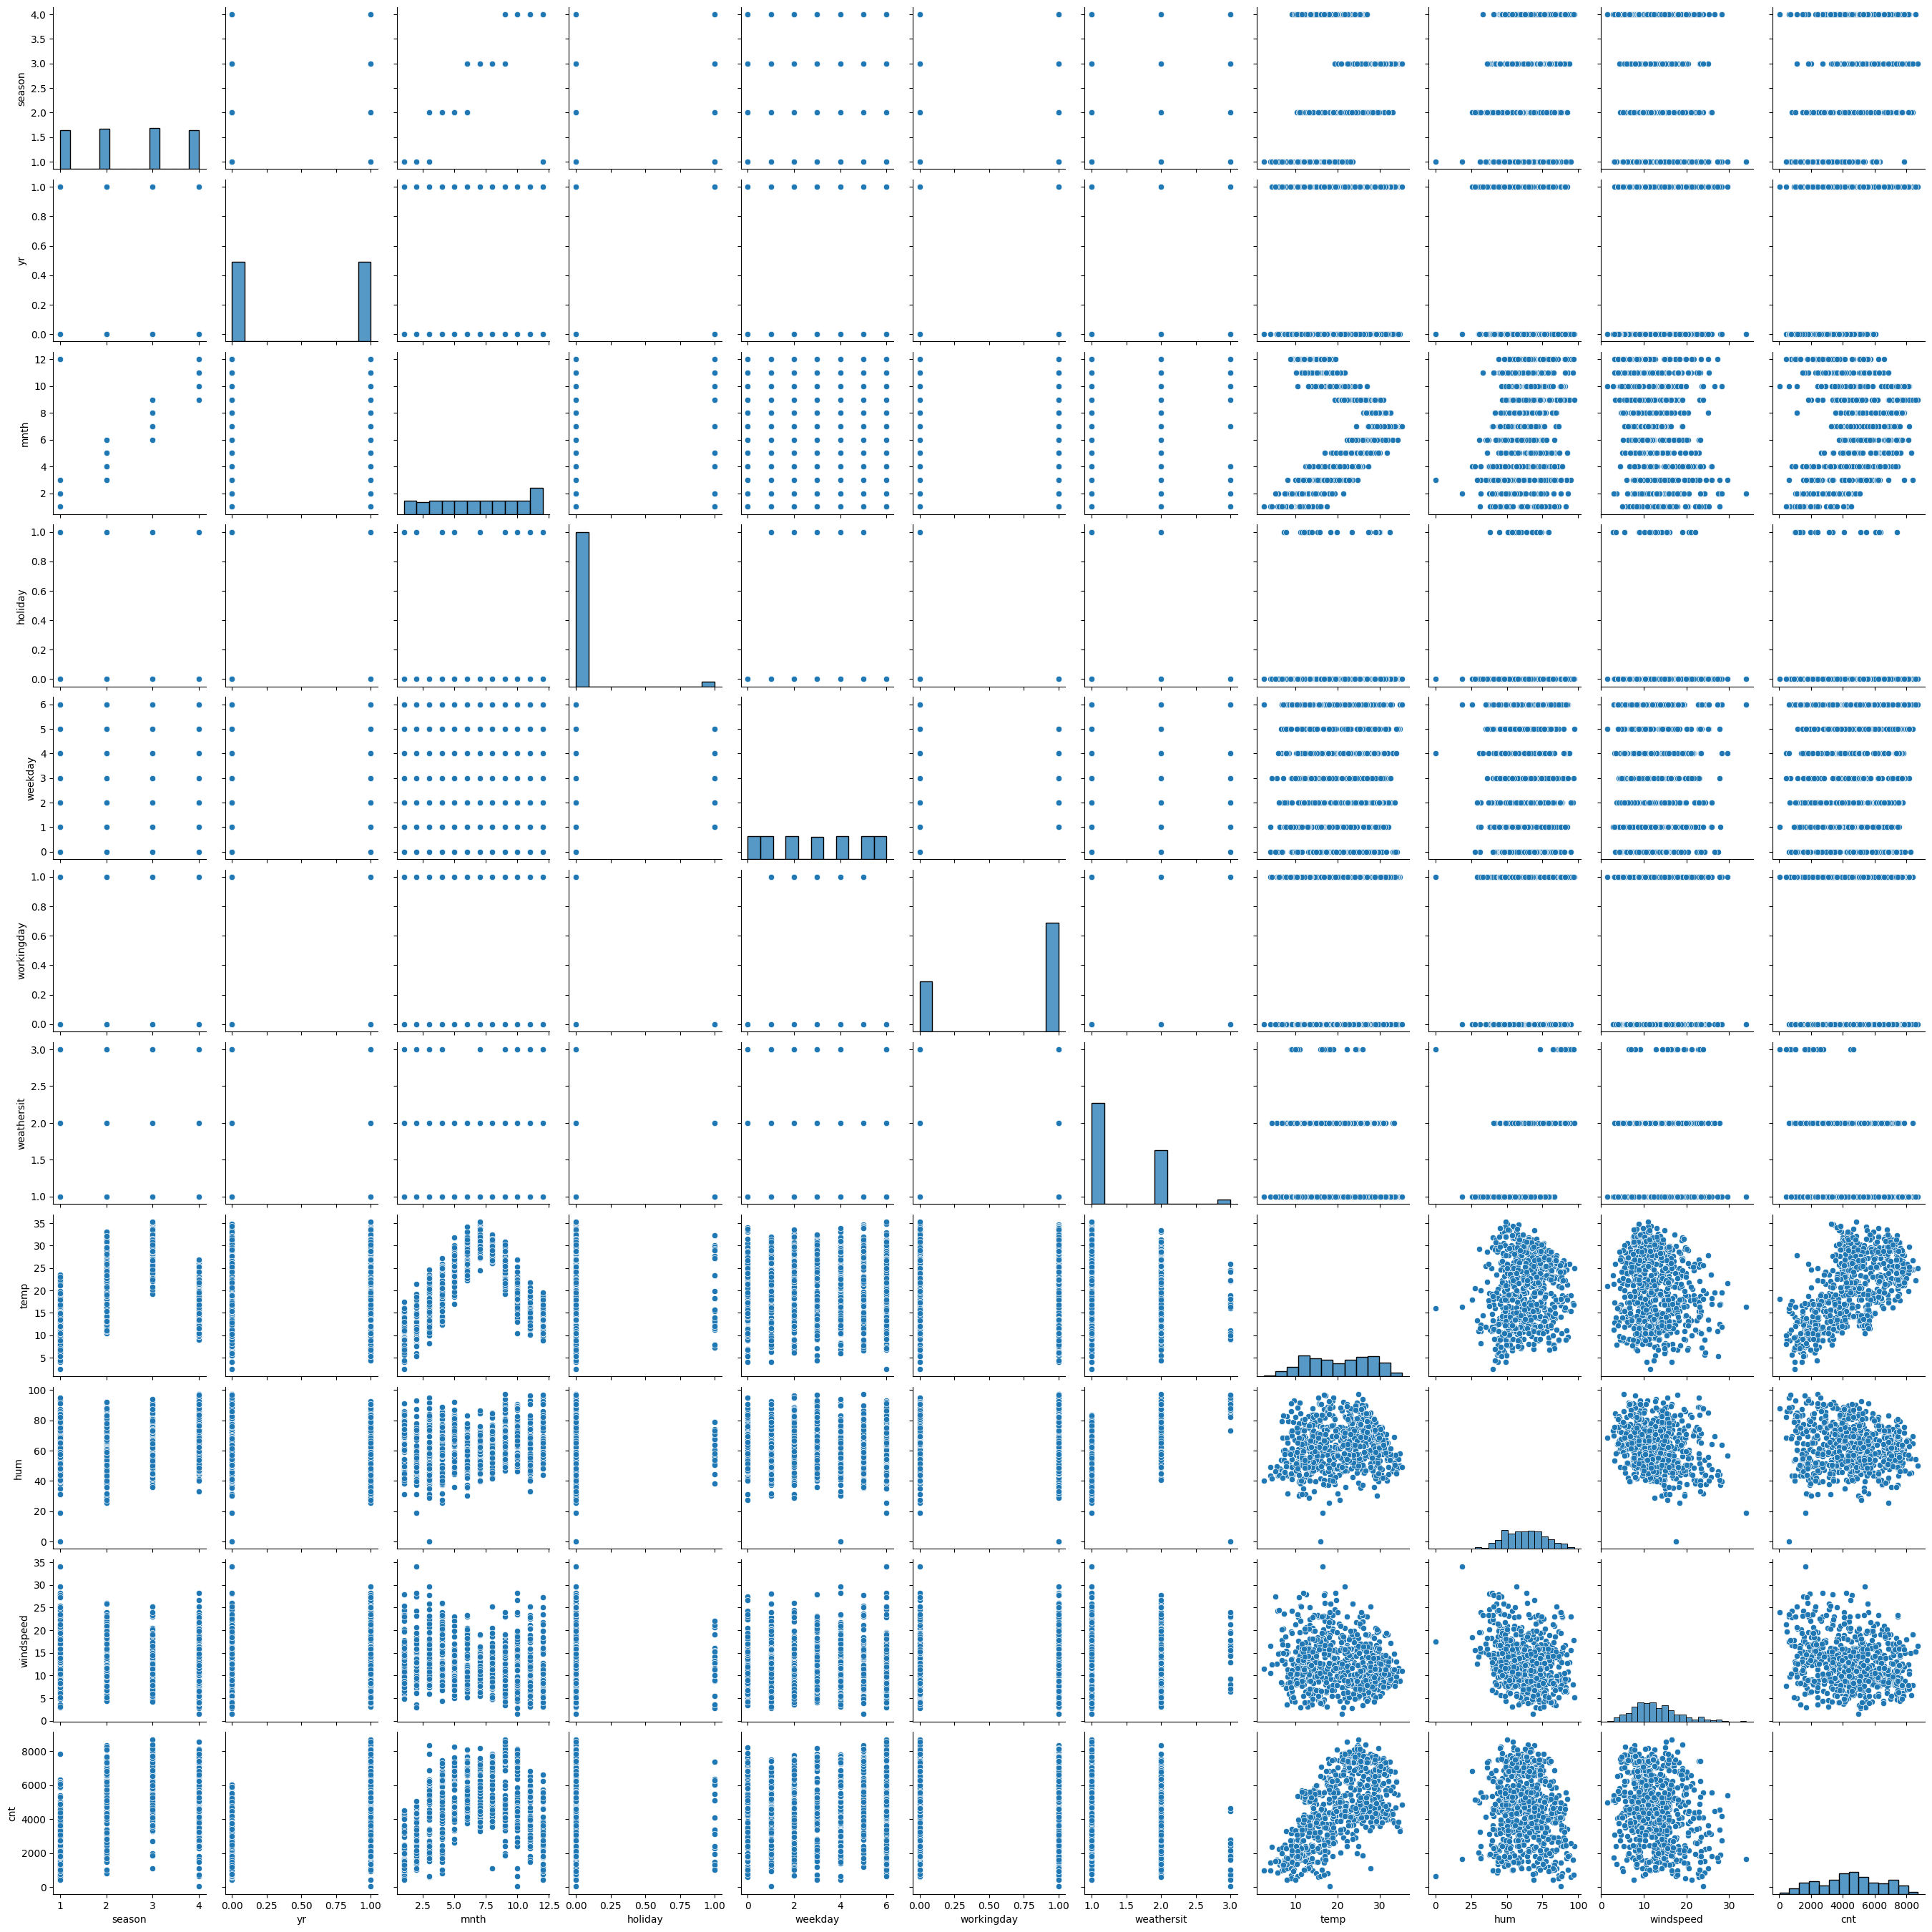

In [257]:
sns.pairplot(day)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

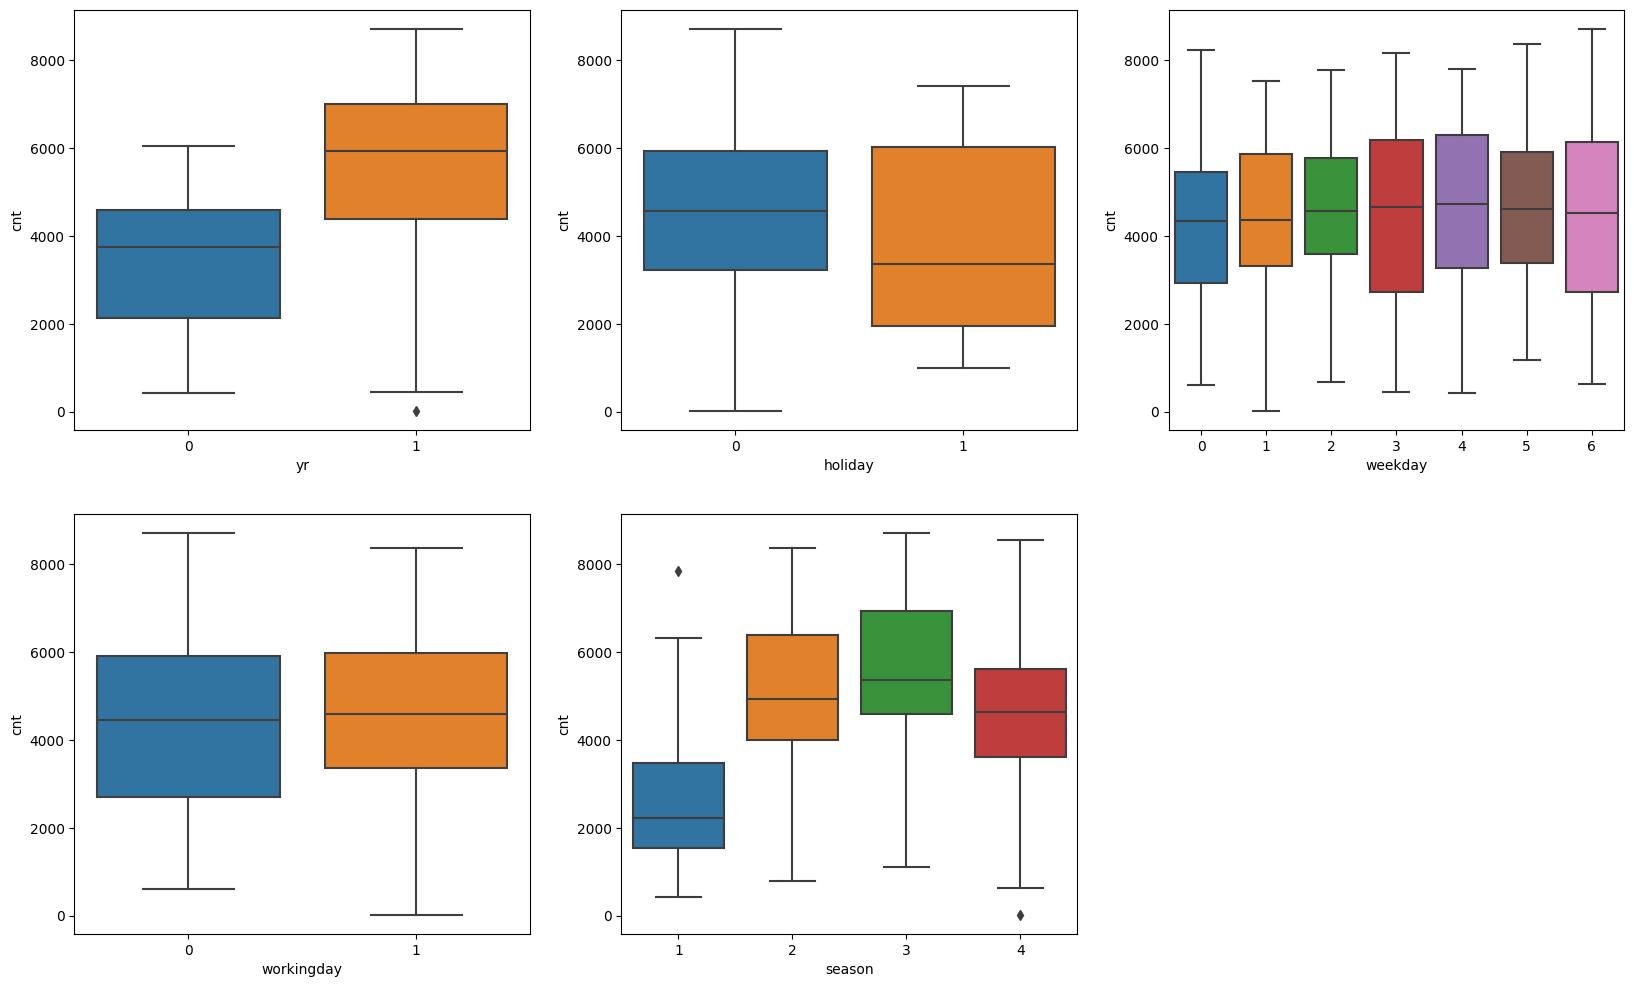

In [258]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.subplot(2,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.subplot(2,3,5)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.show()

Based on above plots

*   'year' with value 1 (2019) has more 'cnt' compared to 0 (2018)
*   non-holidays has more 'cnt'
*   'workingday' 0 or 1 doesn't have much difference
*   'season' 2 and 3 have more 'cnt' comared to 1 and 4




## Step 3: Data Preparation
### Dummy Variables
Lets create dummy variables for numeric features with multiple levels

*   yr
*   season
*   weekday
*   mnth
*   weathersit



First map seasons levels to respective seasons 1: spring, 2: summer, 3: fall, 4: winter

In [259]:
def summer_map(x):
  return x.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

day[['season']] = day[['season']].apply(summer_map)
day[['season']].head()

,season
0,spring
1,spring
2,spring
3,spring
4,spring


Now create dummy variables for season

In [260]:
seasons = pd.get_dummies(day['season'], drop_first=True)
seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


Drop original 'season' variable from dataframe and append these dummies

In [261]:
day.drop(['season'], axis=1, inplace=True)
day = pd.concat([day, seasons], axis=1)
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   mnth        730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
 10  spring      730 non-null    uint8  
 11  summer      730 non-null    uint8  
 12  winter      730 non-null    uint8  
dtypes: float64(3), int64(7), uint8(3)
memory usage: 59.3 KB


Repeat this process for other categorical variables

In [262]:
#map months
def month_map(x):
  return x.map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'})

day[['mnth']] = day[['mnth']].apply(month_map)

mnths = pd.get_dummies(day['mnth'], drop_first=True)

day.drop(['mnth'], axis=1, inplace=True)
day = pd.concat([day, mnths], axis=1)
mnths.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [263]:
#map year
def year_map(x):
  return x.map({0: '2018', 1: '2019'})

day[['yr']] = day[['yr']].apply(year_map)

years = pd.get_dummies(day['yr'], drop_first=True)

day.drop(['yr'], axis=1, inplace=True)
day = pd.concat([day, years], axis=1)
years.head()

,2019
0,0
1,0
2,0
3,0
4,0


In [264]:
#map weekday
def weekday_map(x):
  return x.map({0: 'sun', 1: 'mon',2: 'tue', 3: 'wed',4: 'thu', 5: 'fri', 6: 'sat'})

day[['weekday']] = day[['weekday']].apply(weekday_map)

weekdays = pd.get_dummies(day['weekday'], drop_first=True)

day.drop(['weekday'], axis=1, inplace=True)
day = pd.concat([day, weekdays], axis=1)
weekdays.head()

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [265]:
#map weathersit
def weather_map(x):
  return x.map({1: 'Clear_Few_clouds_Partly_cloudy',
                2: 'Mist_Cloudy_Broken_clouds_Few_clouds',
                3: 'Light_Snow_Rain_Thunderstorm_Scattered_clouds_Light_Rain_Scattered_clouds',
                4: 'Heavy_Rain_Ice_Pallets_Thunderstorm_Mist_Snow_Fog'})

day[['weathersit']] = day[['weathersit']].apply(weather_map)

weathersit = pd.get_dummies(day['weathersit'], drop_first=True)

day.drop(['weathersit'], axis=1, inplace=True)
day = pd.concat([day, weathersit], axis=1)
weathersit.head()

,Light_Snow_Rain_Thunderstorm_Scattered_clouds_Light_Rain_Scattered_clouds,Mist_Cloudy_Broken_clouds_Few_clouds
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [266]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,...,sep,2019,mon,sat,sun,thu,tue,wed,Light_Snow_Rain_Thunderstorm_Scattered_clouds_Light_Rain_Scattered_clouds,Mist_Cloudy_Broken_clouds_Few_clouds
653,0,1,19.201653,55.8333,12.208807,7534,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
576,0,1,29.246653,70.4167,11.083475,7216,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
426,0,0,16.980847,62.1250,10.792293,4066,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
728,0,0,10.489153,48.3333,23.500518,1796,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
482,0,0,15.443347,48.9583,8.708325,4220,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1


### Rescaling the Features

Scale numeric features using Min-Max scaler

In [267]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars= ['temp', 'hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [268]:
df_train.describe()

,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,...,sep,2019,mon,sat,sun,thu,tue,wed,Light_Snow_Rain_Thunderstorm_Scattered_clouds_Light_Rain_Scattered_clouds,Mist_Cloudy_Broken_clouds_Few_clouds
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,...,0.080392,0.507843,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,...,0.272166,0.500429,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Check correlations to check which variables are correlated

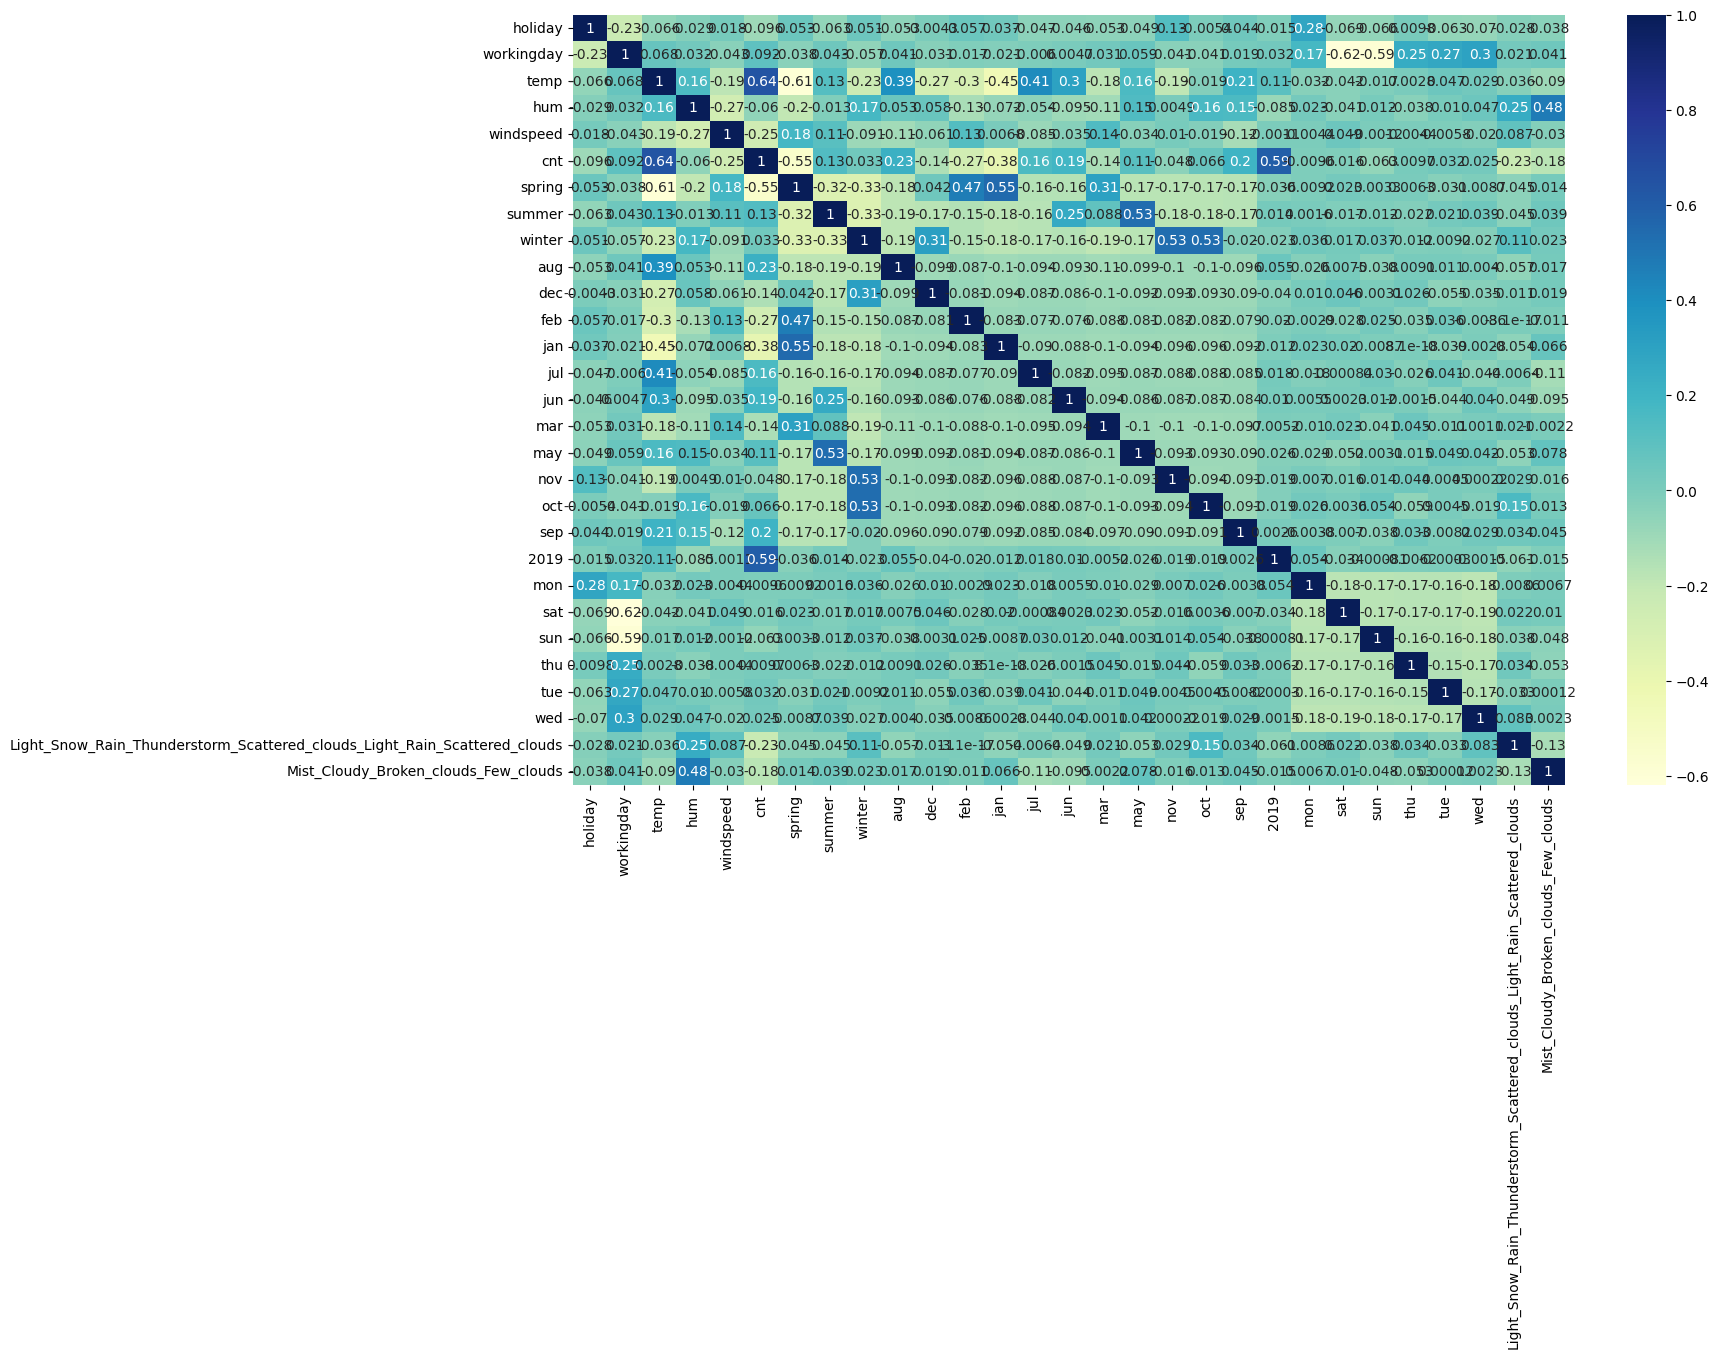

In [269]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

### Dividing into X and Y sets for the model building

In [270]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

### RFE
Recursive feature elimination

In [271]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [272]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [273]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 7),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('jul', True, 1),
 ('jun', False, 13),
 ('mar', False, 14),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 10),
 ('sep', True, 1),
 ('2019', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 11),
 ('tue', False, 9),
 ('wed', False, 12),
 ('Light_Snow_Rain_Thunderstorm_Scattered_clouds_Light_Rain_Scattered_clouds',
  True,
  1),
 ('Mist_Cloudy_Broken_clouds_Few_clouds', True, 1)]

In [274]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'jul', 'sep', '2019', 'sat', 'sun',
       'Light_Snow_Rain_Thunderstorm_Scattered_clouds_Light_Rain_Scattered_clouds',
       'Mist_Cloudy_Broken_clouds_Few_clouds'],
      dtype='object')

In [275]:
X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'jan', 'jun', 'mar', 'may', 'nov', 'oct', 'mon',
       'thu', 'tue', 'wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [276]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [277]:
# Adding a constant variable
import statsmodels.api as sm


In [278]:
X_train_rfe = sm.add_constant(data=X_train_rfe)
X_train_rfe.head()

,const,holiday,workingday,temp,hum,windspeed,spring,summer,winter,jul,sep,2019,sat,sun,Light_Snow_Rain_Thunderstorm_Scattered_clouds_Light_Rain_Scattered_clouds,Mist_Cloudy_Broken_clouds_Few_clouds
653,1.0,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,1,0,0,0,0
576,1.0,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,1,0,0,0,0
426,1.0,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,1,0,0,1
728,1.0,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,1,0,1,0,0
482,1.0,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,1,0,0,1


In [279]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.13e-191
Time:                        07:16:54   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

Lets look at VIF information to identify any correlations

In [280]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_new = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,50.69
11,sat,12.20
12,sun,11.79
5,spring,5.02
2,temp,3.62
7,winter,3.49
0,holiday,2.91
6,summer,2.61
3,hum,1.91
14,Mist_Cloudy_Broken_clouds_Few_clouds,1.57


'workingday' seems to be having high VIF. Try to drop it

In [281]:
X_train_new = X_train_rfe.drop(['workingday'], axis=1)
X_train_new = sm.add_constant(data=X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.13e-191
Time:                        07:16:55   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [282]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_new = X_train_new.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,28.28
1,temp,16.06
3,windspeed,4.68
4,spring,4.03
6,winter,3.37
5,summer,2.78
13,Mist_Cloudy_Broken_clouds_Few_clouds,2.30
9,2019,2.08
7,jul,1.59
8,sep,1.39


In [283]:
X_train_new = X_train_new.drop(['sat'], axis=1)
X_train_new = sm.add_constant(data=X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.13e-192
Time:                        07:16:55   Log-Likelihood:                 517.45
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     496   BIC:                            -947.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [284]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_new = X_train_new.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,28.28
1,temp,16.03
3,windspeed,4.65
4,spring,4.01
6,winter,3.35
5,summer,2.78
12,Mist_Cloudy_Broken_clouds_Few_clouds,2.30
9,2019,2.08
7,jul,1.59
8,sep,1.39


In [285]:
X_train_new = X_train_new.drop(['hum'], axis=1)
X_train_new = sm.add_constant(data=X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          6.45e-190
Time:                        07:16:55   Log-Likelihood:                 508.10
No. Observations:                 510   AIC:                            -990.2
Df Residuals:                     497   BIC:                            -935.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [286]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_new = X_train_new.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.14
2,windspeed,4.60
4,summer,2.22
3,spring,2.11
8,2019,2.07
5,winter,1.82
6,jul,1.59
11,Mist_Cloudy_Broken_clouds_Few_clouds,1.55
7,sep,1.34
9,sun,1.18


In [287]:
X_train_new = X_train_new.drop(['windspeed'], axis=1)
X_train_new = sm.add_constant(data=X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.0
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.31e-183
Time:                        07:16:55   Log-Likelihood:                 490.33
No. Observations:                 510   AIC:                            -956.7
Df Residuals:                     498   BIC:                            -905.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [288]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_new = X_train_new.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.27
7,2019,2.06
3,summer,1.94
4,winter,1.61
5,jul,1.58
10,Mist_Cloudy_Broken_clouds_Few_clouds,1.55
2,spring,1.43
6,sep,1.34
8,sun,1.18
9,Light_Snow_Rain_Thunderstorm_Scattered_clouds_...,1.07


In [289]:
X_train_new = X_train_new.drop(['summer'], axis=1)
X_train_new = sm.add_constant(data=X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     240.3
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.33e-183
Time:                        07:17:55   Log-Likelihood:                 487.47
No. Observations:                 510   AIC:                            -952.9
Df Residuals:                     499   BIC:                            -906.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [290]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_new = X_train_new.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.08
6,2019,2.05
9,Mist_Cloudy_Broken_clouds_Few_clouds,1.51
3,winter,1.36
4,jul,1.33
2,spring,1.27
5,sep,1.19
7,sun,1.17
8,Light_Snow_Rain_Thunderstorm_Scattered_clouds_...,1.07
0,holiday,1.05


All P-Values and VIF values seems to be in acceptable limits now try to do the residual analysis.

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [292]:
X_train_lm = sm.add_constant(X_train_new)
y_train_cnt = lm.predict(X_train_lm)

In [293]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

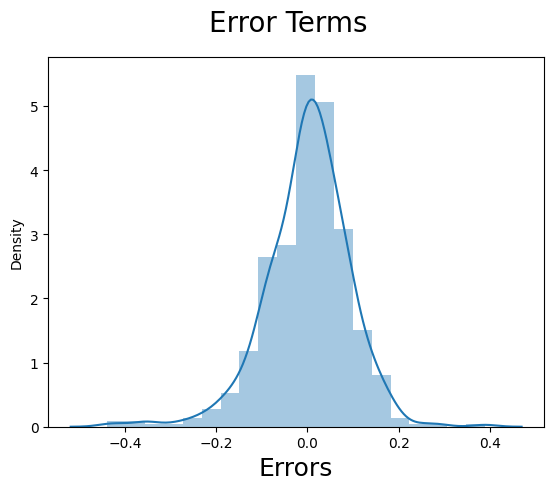

In [295]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

Error terms are normaly distrubuted with 0 as the mean

## Making Predictions

#### Applying the scaling on the test sets

In [296]:
num_vars= ['temp', 'hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [297]:
y_test = df_test.pop('cnt')
X_test = df_test

In [298]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [299]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

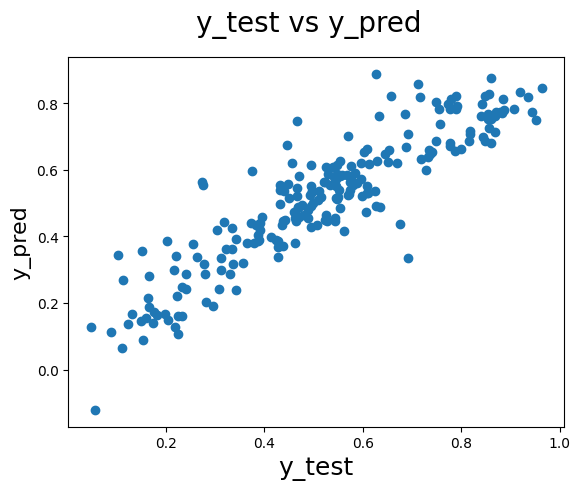

In [300]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [301]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8114452236660386